In [ ]:
import requests
import json
url = "http://0.0.0.0:5000/imagecaption/do"
try:
    result = requests.post(url)
    result = json.loads(result.content.decode('utf-8'))
    if result['status'] == 'ok':
        print(result)
    else:
        print("网络错误，请稍后再试")
except Exception as e:
    print(e)

{'status': 'ok', 'resultInfo': '{"caption":{"0":"a red double decker bus driving down a street.","1":"a woman riding a surfboard on top of a wave.","2":"a man holding a hot dog in his hand.","3":"a couple of people standing next to each other.","4":"two men standing next to each other on a horse.","5":"a person riding a bike on a street.","6":"two men sitting at a table eating food.","7":"a woman is sitting on a chair with a cell phone.","8":"a man sitting at a table with a plate of food."},"image_files":{"0":".\\/test\\/images\\/1.jpg","1":".\\/test\\/images\\/2.jpg","2":".\\/test\\/images\\/3.jpeg","3":".\\/test\\/images\\/4.jpeg","4":".\\/test\\/images\\/5.jpeg","5":".\\/test\\/images\\/6.jpg","6":".\\/test\\/images\\/7.jpeg","7":".\\/test\\/images\\/8.jpeg","8":".\\/test\\/images\\/9.jpeg"},"prob":{"0":0.016027447,"1":0.0091833125,"2":0.0005462197,"3":0.0022884307,"4":0.0018406301,"5":0.0003673109,"6":0.0051221965,"7":0.000108004,"8":0.0136911698}}', 'img_results': '{"6_result.jpg"

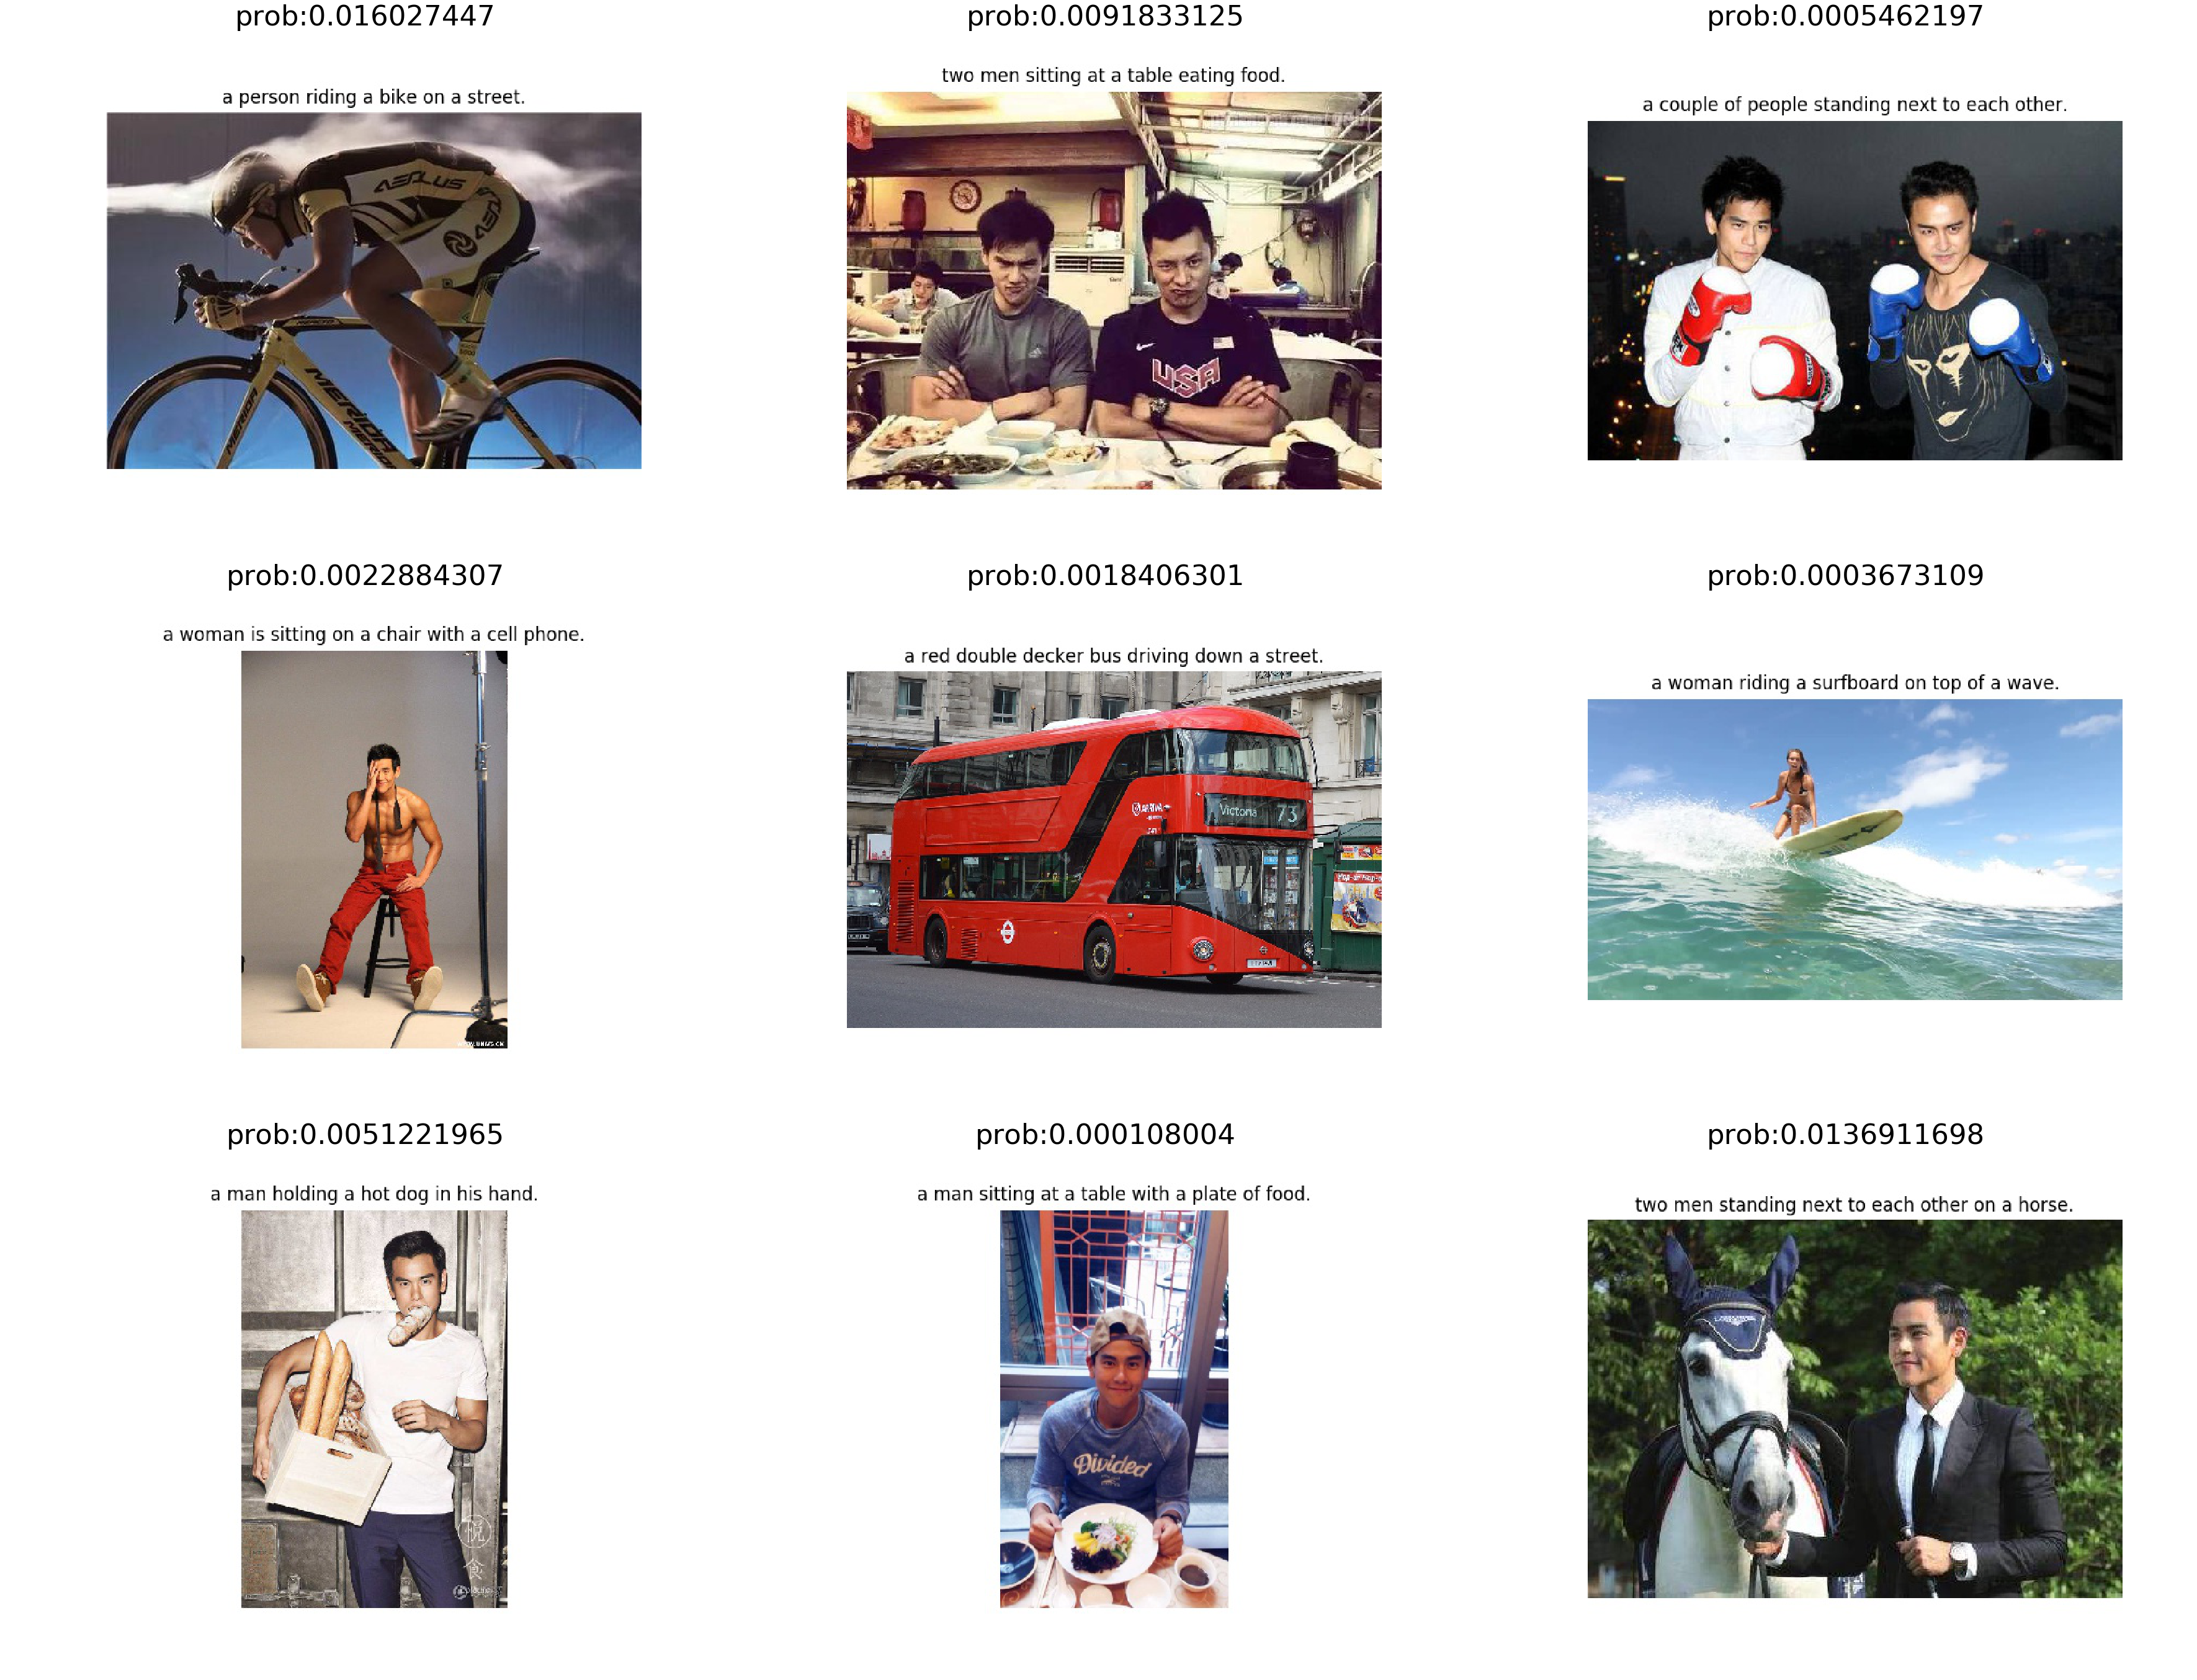

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(result_images, filenames, probs, captions=None):
    result_images = list(result_images)
    filenames = list(filenames)
    probs = list(probs)
#     captions = list(captions)
    nimages = np.array(result_images).shape[0]
    index = 0
    rows = 1 if(nimages < 3) else np.round(nimages/3+0.5)
    fig = plt.figure(figsize=(50, 50))
    for i in range(nimages):
        plt.subplot(rows, 3, i+1)
        img = plt.imread(result_images[i])
        plt.imshow(img)
        plt.title("prob:" + str(probs[i]), fontsize=45)
        plt.axis("off")
    plt.tight_layout()
    plt.savefig("result.jpg")
    plt.show()  
    
if result['status'] == 'ok':
    resultInfo = json.loads(result["resultInfo"])
    img_result = json.loads(result["img_results"])
#     print("caption\t\t source_img\t\t prob\t\t filename\t\t result_img")
#     for caption, source_img, prob, filename, result_img in zip(resultInfo["caption"].values(), resultInfo["image_files"].values(),
#                                                      resultInfo["prob"].values(), img_result.keys(), img_result.values()):
#         print(caption, source_img, prob, filename, result_img)
    show_images(img_result.values(), img_result.keys(), resultInfo["prob"].values())
else:
    print("网络错误，请稍后再试")
    
    